<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Иван! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Проект: Поиск по изображениям

**Заказчик исследования:** Фотохостинг для профессиональных фотографов «Со Смыслом» (“With Sense”). 

**Цель проекта:** разработать демонстрационную версию модели поиска изображений по текстовому запросу.

**Полученные данные:** набор изображений с текстовым сопровождением и оценкой соответствия текста изображениям + набор данных для тестирования модели

**План работы:**

1. Исследовательский анализ данных
2. Проверка данных
3. Векторизация изображений
4. Векторизация текстов
5. Объединение векторов
6. Обучение модели предсказания соответствия
7. Тестирование модели
8. Вывод

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

In [1]:
import os
import pandas as pd
import numpy as np
import random as rd
np.random.seed(42)
from math import ceil
from pathlib import Path

import matplotlib.pyplot as plt

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

from PIL import Image

import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
from torchvision import models, transforms

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GroupShuffleSplit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
RANDOM_STATE = 42

## Загрузка данных и первичный анализ

In [3]:
df_train = pd.read_csv(r'/kaggle/input/dataset-full/to_upload/train_dataset.csv')
df_test = pd.read_csv(r'/kaggle/input/dataset-full/to_upload/test_queries.csv', sep='|', index_col='Unnamed: 0')
crowd_ann = pd.read_csv(r'/kaggle/input/dataset-full/to_upload/CrowdAnnotations.tsv', sep='\t', names = ['image', 'query_id', 'fraction', 'pros', 'cons'])
expert_ann = pd.read_csv(r'/kaggle/input/dataset-full/to_upload/ExpertAnnotations.tsv', sep='\t', names = ['image', 'query_id', 'first', 'second', 'third'])
test_images = pd.read_csv('/kaggle/input/dataset-full/to_upload/test_images.csv', sep='|')

In [4]:
PATH_TRAIN = r'/kaggle/input/dataset-full/to_upload/train_images'
PATH_TEST = r'/kaggle/input/dataset-full/to_upload/test_images'

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:
 
    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием этой константы, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   
Чтобы запустить твой код при проверке я был вынужден руками менять код по всему ноутбуку. Прошу тебя внести изменения так, чтобы путь к данным нужно было изменять всего один раз.


А вот это образец универсального кода для загрузки данных    
    
    DATA_PATH = твой путь    
    
    df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
    ....
    
или можешь использовать библиотеку Path, которую я вижу ниже.
    
Но принцип один - базовую константу с путем к данным мы определяем один раз в начале проекта.    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
Добавил константы вверху + заменил хардкод

</div>

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [6]:
df_train.head(5)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [7]:
len(df_train['image'].unique())

1000

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [9]:
df_test.head()

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


In [10]:
len(df_test['image'].unique())

100

In [11]:
crowd_ann.info()
display(crowd_ann.describe())
display(crowd_ann.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     47830 non-null  object 
 1   query_id  47830 non-null  object 
 2   fraction  47830 non-null  float64
 3   pros      47830 non-null  int64  
 4   cons      47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


,fraction,pros,cons
count,47830.000000,47830.000000,47830.000000
mean,0.068786,0.208488,2.820155
std,0.207532,0.628898,0.656676
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,0.000000,0.000000,3.000000
75%,0.000000,0.000000,3.000000
max,1.000000,5.000000,6.000000


,image,query_id,fraction,pros,cons
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Не стоит использовать функцию `print()` для вывода датафреймов, получается не очень красиво (точнее очень неаккуратно и тяжело читаемо). В большинстве случаев можно вообще обойтись без команды, достаточно обратиться к таблице в последней строке ячейки. Или использовать функцию `display()`

--------------
    
Оставлю красный комментарий, т.к. этот момент обсуждается на первом спринте, где ты сталкивался  с jupyter notebook, а сейчас ты в шаге от финального проекта.  Да и исправить это не сложно, а проект сразу выиграет.   

-------------
    
я не буду дублировать этот комментарий, но пожалуйста исправь этот момент во всем проекте   
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
поправил

</div>

In [12]:
expert_ann.info()
display(expert_ann.describe())
display(expert_ann.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   first     5822 non-null   int64 
 3   second    5822 non-null   int64 
 4   third     5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


,first,second,third
count,5822.000000,5822.000000,5822.000000
mean,1.436620,1.624356,1.881999
std,0.787084,0.856222,0.904087
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000


,image,query_id,first,second,third
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


данные загружены. по итогам первичного анализа можно сделать следующие выводы:
1. в данных отсутствуют пропуски.
2. для тренировки модели предоставлено 1000 изображений
3. для тестирования модели предоставлено 100 изображений
4. краудсорсинговая оценка - средняя доля подтвердивших соответствие изображения текстовому описанию составляет всего 7%. среднее количество участников краудсорсинговой оценки - 3 человека
5. экспертная оценка - средняя экспертная оценка не превышает 2

судя по всему мы имеем большой перекос в сторону несоответствия текстов изображениям

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 ОК, данные загружены, есть первичное знакомство </div>

## Исследовательский анализ

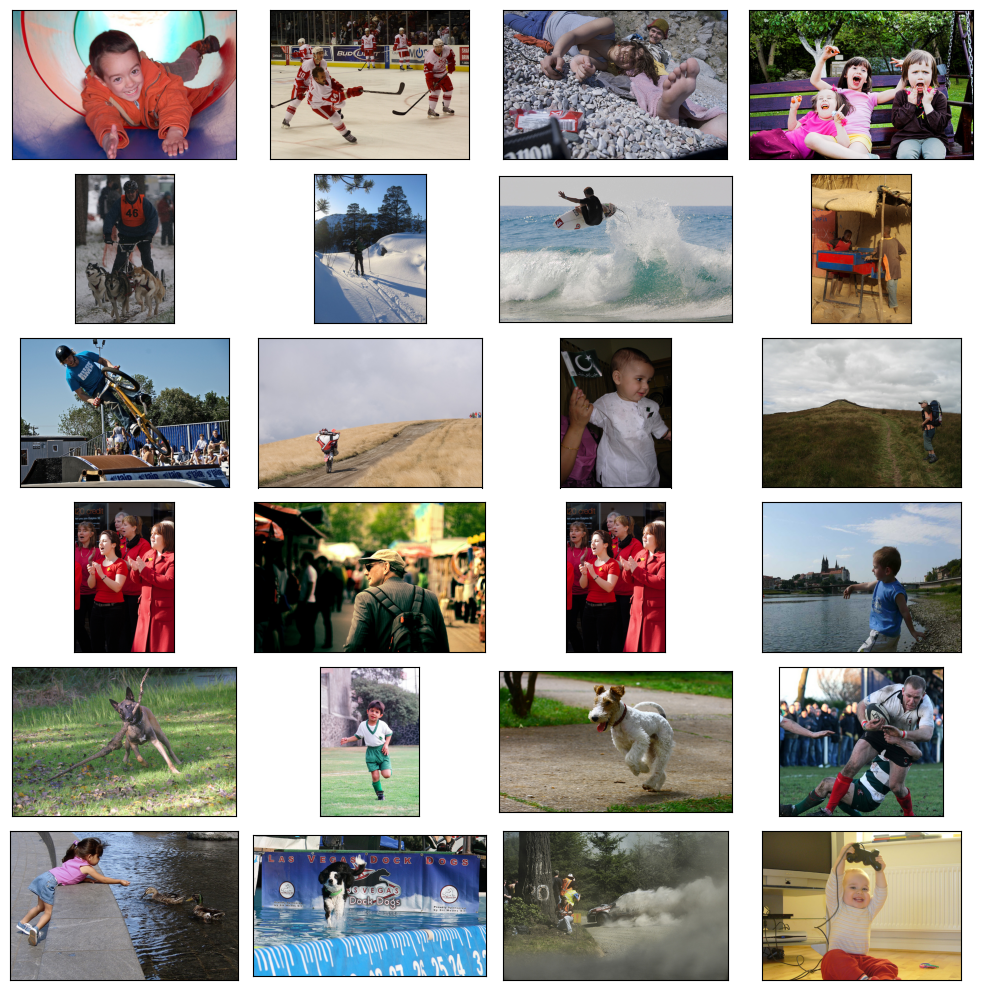

In [13]:

samples_train = list(df_train['image'].sample(12))
samples_test = list(df_test['image'].sample(12))

fig = plt.figure(figsize=(10,10))
for i in range(12):
    fig.add_subplot(6, 4, i+1)
    image = Image.open(Path(PATH_TRAIN, samples_train[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
for i in range(12):
    fig.add_subplot(6, 4, i+13)
    image = Image.open(Path(PATH_TEST, samples_test[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

#del image


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Пожалуйста, на следующее ревью пришли проект, в котором все ячейки будут выполнены.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
после того как убрал "del image" все начало работать нормально

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
И как напоминался - здесь пример хардкода путей, которые нужно исправить.</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
поправил

</div>

- в датасете представлены изображения разного качества, наклона, пола, типа (фас, профиль и т.д.), тематики
- все изображения цветные
- изображения имеют разные размеры (потребуется приведение к единому формату)

In [14]:
def result_exp(str_in):
    res=[0,0,0,0]
    for i in range(0,3):
        res[int(str_in[i+2]-1)]+=1
    if max(res) == 1:
        return None
    else:
        try:
            return res.index(max(res))+1
        except:
            print('ERROR')
            return None

In [15]:
expert_ann['expert'] = expert_ann.apply(result_exp, axis=1)

/tmp/ipykernel_254/1995044521.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res[int(str_in[i+2]-1)]+=1


In [16]:
expert_ann.head()

,image,query_id,first,second,third,expert
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1.0
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2.0
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1.0


In [17]:
expert_ann = expert_ann.dropna()

In [18]:
expert_ann.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5696 entries, 0 to 5821
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     5696 non-null   object 
 1   query_id  5696 non-null   object 
 2   first     5696 non-null   int64  
 3   second    5696 non-null   int64  
 4   third     5696 non-null   int64  
 5   expert    5696 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 311.5+ KB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [19]:
train_data = expert_ann.merge(df_train, left_on=['query_id', 'image'], right_on=['query_id', 'image'], how='inner')
train_data = train_data.drop(['first', 'second', 'third'], axis=1)

In [20]:
train_data.info()
display(train_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       5696 non-null   object 
 1   query_id    5696 non-null   object 
 2   expert      5696 non-null   float64
 3   query_text  5696 non-null   object 
dtypes: float64(1), object(3)
memory usage: 178.1+ KB


,image,query_id,expert,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1.0,A young child is wearing blue goggles and sitt...
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.0,A girl wearing a yellow shirt and sunglasses s...
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.0,A man sleeps under a blanket on a city street .
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,2.0,A woman plays with long red ribbons in an empt...
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1.0,Chinese market street in the winter time .
5,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,1.0,A soccer ball is above the head of a man weari...
6,1056338697_4f7d7ce270.jpg,3545652636_0746537307.jpg#2,1.0,A young boy dressed in a red uniform kicks the...
7,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,1.0,A man and woman look back at the camera while ...
8,106490881_5a2dd9b7bd.jpg,1425069308_488e5fcf9d.jpg#2,1.0,A white dog jumps to catch a blue ball in a li...
9,106490881_5a2dd9b7bd.jpg,1714316707_8bbaa2a2ba.jpg#2,2.0,A little boy shakes the snow off of a tree .


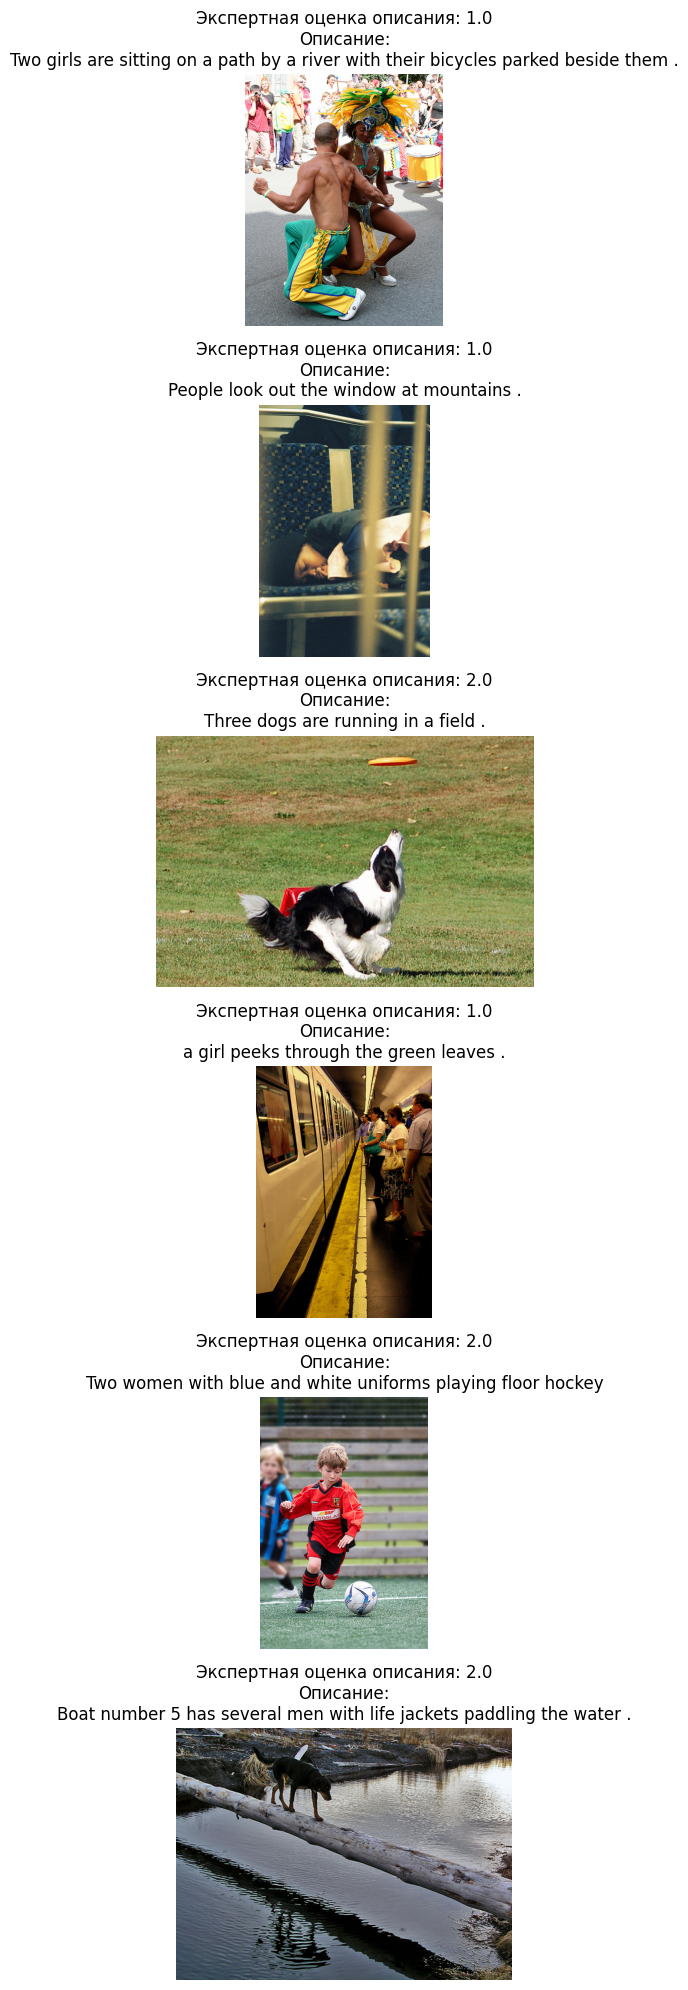

In [21]:
random_images = train_data.sample(6)

fig = plt.figure(figsize=(20,20))

for i, row in enumerate(random_images.itertuples()):
    fig.add_subplot(6, 1, i+1)
    image = Image.open(Path(PATH_TRAIN, row.image))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Экспертная оценка описания: {row.expert}\nОписание:\n{row.query_text}")

plt.tight_layout()
plt.show()

#del image



для получения агрегированной оценки выбраны оценки экспертов.
среди оценок экспертов выбирается оценка, которую поставило большинство экспертов (т.е. 2 или 3). если все оценки разные, то такие данные удаляются. по итогу обработки оценок и слияния датасета с оценками с тестовым датасетом осталось 5696 записей из 5822)

Визуально подтверждается, что итоговая экспертная оценка вполне отображает соответствие изображения текстовому описанию.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Я вижу, что ты решил отказаться от крауд оценок.  Я двумя руками поддерживаю эту стратегию, но в твоем случае не понимаю, было это сделано осознанно или ты просто про них забыл?


--------------------------
    
    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   

   - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
   - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.

   - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь

   - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....

    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
исходил из того, что экспертная оценка имеет большую точность (шкала от 1 до 4), тогда как краудсорсинговая только (1 или 0).
далее исходил из того, что лучше меньше данных, но точнее, чем больше, но хуже

</div>

In [22]:
#random_images = df_test.sample(6)

#fig = plt.figure(figsize=(20,20))

#for i, row in enumerate(random_images.itertuples()):
#    fig.add_subplot(6, 1, i+1)
#    image = Image.open(Path(PATH_TEST, row.image))
#    plt.imshow(image)
#    plt.axis('off')
#    plt.title(f"Описание:\n{row.query_text}")

#plt.tight_layout()
#plt.show()

#del image

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Совершенно непонятно, что это за код, какие задачи он решает.
    
Стоит прислать проект в котором все ячейки будут выполнены, а также дать дополнительные пояснения, что ты увидел на этих изображениях.    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
этот код просто забыл удалить. замьютил его.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
По заданию нужно привести таргет к диапазону 0-1. А он у тебя остался в диапазоне 1-4.

Советую воспользоваться простым линейным преобразованием (x-1)/3

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
добавил код ниже

</div>

In [23]:
train_data['expert'] = (train_data['expert'] - 1) / 3
train_data['expert'].unique()

array([0.        , 0.33333333, 0.66666667, 1.        ])

## Проверка данных

In [24]:
CHILD_WORDS = ["children", "teenager", "baby", "child", "youth", "girl", "boy",
                "infant", "toddler", "youngster", "adolescent", "teen", "kid",
                "student", "pupil", "grandchild", "sister", "brother", "nephew",
                "niece", "daughter", "son"]

In [25]:
nlp = spacy.load("en_core_web_sm")

def lemma_clear(text):
    lemm = nlp(text)
    lemm = " ".join([token.lemma_ for token in lemm])


    return " ".join(lemm.split())

In [26]:
train_data['lemm_text'] = train_data['query_text'].apply(lemma_clear)
df_test['lemm_text'] = df_test['query_text'].apply(lemma_clear)

In [27]:
train_data.head(2)

,image,query_id,expert,query_text,lemm_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.0,A young child is wearing blue goggles and sitt...,a young child be wear blue goggle and sit in a...
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,0.0,A girl wearing a yellow shirt and sunglasses s...,a girl wear a yellow shirt and sunglass smile .


In [28]:
df_test.head(2)

,query_id,query_text,image,lemm_text
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg,"two blonde boy , one in a camouflage shirt and..."
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg,two boy be squirt water gun at each other .


In [29]:
def child_search(text):
    for s in CHILD_WORDS:
        if text.find(s) > -1:
            return False
    return True

In [30]:
train_data['no_child_words'] = train_data['lemm_text'].apply(child_search)

In [31]:
train_data.sample(5)

,image,query_id,expert,query_text,lemm_text,no_child_words
2458,2913965136_2d00136697.jpg,3545652636_0746537307.jpg#2,0.666667,A young boy dressed in a red uniform kicks the...,a young boy dress in a red uniform kick the so...,False
2495,2926233397_71e617f3a3.jpg,3461041826_0e24cdf597.jpg#2,0.666667,A black and white dog is splashing in a stream .,a black and white dog be splash in a stream .,True
979,2228022180_9597b2a458.jpg,3254817653_632e840423.jpg#2,0.333333,A group of five adults stand posing in front o...,a group of five adult stand pose in front of b...,True
3769,3350786891_6d39b234e9.jpg,241345844_69e1c22464.jpg#2,0.000000,A football player is talking to his coach .,a football player be talk to his coach .,True
563,180094434_b0f244832d.jpg,180094434_b0f244832d.jpg#2,1.000000,Three boys play around a fountain in an office...,three boy play around a fountain in an office ...,False


In [32]:
# функция, которая отбрасывает все что справа от '#'

def spl(text):
    return text[:text.find('#')]

In [33]:
# находим названия уникальных изображений, которым соответствуют запросы, содержащие запрещенные слова
images_with_child = list(train_data[train_data['no_child_words']==False]['query_id'].apply(spl).unique())

In [34]:
len(images_with_child)

337

In [35]:
# функция, которая определяет запрещенные изображения
def bad_image(image):
    if image in images_with_child:
        return True
    else:
        return False

In [36]:
train_data['bad_image'] = train_data['image'].apply(bad_image)

In [37]:
train_data = train_data[train_data['bad_image'] == False]

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3746 entries, 0 to 5673
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image           3746 non-null   object 
 1   query_id        3746 non-null   object 
 2   expert          3746 non-null   float64
 3   query_text      3746 non-null   object 
 4   lemm_text       3746 non-null   object 
 5   no_child_words  3746 non-null   bool   
 6   bad_image       3746 non-null   bool   
dtypes: bool(2), float64(1), object(4)
memory usage: 182.9+ KB


по итогам очистки тренировочного датасета от "детских" изображений осталось 3746 записей.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удаляешь комментарии, в которых есть слова, обозначающие детей. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
понял свою ошибку. в коде выше внес исправления

</div>

## Векторизация изображений

In [39]:
model = models.resnet18()

In [40]:
order_dict = torch.load('/kaggle/input/resnet18/pytorch/default/1/resnet18.pth')


/tmp/ipykernel_254/3941053929.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  order_dict = torch.load('/kaggle/input/resnet18/pytorch/default/1/resnet18.pth')


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При перезапуске где-либо за пределами твоего профиля в Kaggle этот код даст ошибку, т.к. у меня нет доступа к твоим весам модели.

Стоит использовать загрузку предобученных весов модели, которая была использована в текущем спринте.
    
```python
  
resnet = models.resnet18(pretrained=True) #загружаем претренированную модель 
    
```
    
Модель будет автоматически загружена из облака. Более того, не стоит переживать что при перезапуске кода она каждый раз будет скачиваться из облака - все веса кэшируются (сохраняются) на диске и если ты её один раз скачал, следующий раз она будет загружена с диска.    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
пробовал прогрузить так. но выводится ошибка.
как ее обойти в kaggle не знаю.
в конце проекта запустил код, чтобы была видна ошибка

</div>

In [41]:
model.load_state_dict(order_dict)

<All keys matched successfully>

In [42]:
model = torch.nn.Sequential(*list(model.children())[:-1])
model = model.eval()

In [43]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [44]:
# функция векторизации изображений
def vectorize_image(image_path, model, preprocess):
    image = Image.open(image_path)
    image = preprocess(image)
    image = image.unsqueeze(0)

    with torch.no_grad():
        features = model(image)

    return features.numpy().squeeze()

In [45]:
# векторизация изображений
image_vectors = []

for image_name in train_data['image']:
    image_path = Path(PATH_TRAIN, image_name)
    vectorized_image = vectorize_image(image_path, model, preprocess)
    image_vectors.append(vectorized_image)

In [46]:
# перевод векторов в numpy array
if len(image_vectors) > 0:
    image_vectors = np.vstack(image_vectors)
else:
    print("No image vectors found.")

In [47]:
image_vectors.shape

(3746, 512)

для векторизации изображений применена натренированная модель ResNet18. по итогам векторизации изображений получен вектор размерностью (3746, 512)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Отлично, вектра для изображений получены👍 </div>

## Векторизация текстов

In [48]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['query_text'])
text_vectors = tfidf_matrix.toarray()
display("Dimensionality of text vectors:", text_vectors.shape)

'Dimensionality of text vectors:'

(3746, 1000)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас вектора рассчитаны с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.

-----------
    
Что касается выбранного подхода. По моим наблюдения используя TfidfVectorizer крайне редко получается обучить толковую модель.  Я бы советовал все-таки использовать "плотные" вектора полученные с помощью BERT    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Подсвечу желтым, чтобы не потерялось.
    
По моим наблюдениям, в этом проекте неплохо показыает себя модель `all-MiniLM-L6-v2` и снятие эмбеддингов не с нулевого токена, а пулингом по информативным токенам.
    
Запустить её можно либо через transformers, либо через sentence-transformers    
    
https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
попробовал запустить эту историю. не получилось. судя по всему firewall не дает

</div>

для векторизации текстов использован Tfidfvectorizer. по итогам векторизации получен вектор текстов размерностью (3746, 1000)

## Объединение векторов

In [49]:
features = pd.DataFrame(np.hstack((image_vectors, text_vectors)), columns=[f"image_vector_{i}" for i in range(image_vectors.shape[1])] + [f"text_vector_{i}" for i in range(text_vectors.shape[1])])

target = np.array(train_data['expert'])

In [50]:
features.shape

(3746, 1512)

In [51]:
target.shape

(3746,)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

по итогам объединения векторов изображений и векторов текстов получен вектор размерностью (3746, 1512)

## Обучение модели предсказания соответствия

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Пожаулуйста выбери метрику и обоснуй свой выбор.  </div>

нам нужно решить задачу регрессии, соответственно выбор между MAE и RMSE, как наиболее понятными и интерпретируемыми. Лучше будет воспользоваться в качестве метрики RMSE, так как она не будет игнорировать выбросы.

In [52]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=RANDOM_STATE)
train_indices, test_indices = next(gss.split(X=features, y=target, groups=train_data['image']))

features_train, features_valid = features.loc[train_indices], features.loc[test_indices]
target_train, target_valid = target[train_indices], target[test_indices]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

In [53]:
display(features_train.shape, features_valid.shape, target_train.shape, target_valid.shape)


(2624, 1512)

(1122, 1512)

(2624,)

(1122,)

In [54]:
scaler = StandardScaler(with_mean=False)
scaler.fit(features_train)
features_train_scalled = scaler.transform(features_train)
features_valid_scalled = scaler.transform(features_valid)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Обычно перед линейной регрессией и нейронкой я настаиваю на масштабировании  признаков, т.к. это может помочь модели лучше сходиться.  И для любого классического проекта (в том числе выпускного) это строгая рекомендаци.
    
Но в нашем проекте это не очень однозначно. Да, с одной стороны модель будет уделать одинаковое влияние обоим признакам, да и учиться будет быстрее.    

Но есть и минусы масштабирования:

 - Нарушение структуры эмбеддингов – смысл и семантические связи в эмбеддингах могут быть изменены.
 - Потеря важности признаков – относительная важность признаков из разных моделей (ResNet и BERT) может быть потеряна.

Рекомендация:

Попробуй оба подхода (с масштабированием и без) и сравни результаты, чтобы выбрать оптимальный вариант.    
    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
попробую оба подхода

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
добавил dummy

</div>

### модель dummy

In [55]:
dummy_model = DummyRegressor(strategy='median')
dummy_model.fit(features_train, target_train)

DummyRegressor(strategy='median')

In [56]:
dummy_model_scalled = DummyRegressor(strategy='median')
dummy_model_scalled.fit(features_train_scalled, target_train)

DummyRegressor(strategy='median')

In [57]:
display("RMSE Dummy Regressor с шкалированием:", mean_squared_error(target_valid, dummy_model_scalled.predict(features_valid), squared=False))
display("RMSE Dummy Regressor без шкалирования:", mean_squared_error(target_valid, dummy_model.predict(features_valid), squared=False))

'RMSE Dummy Regressor с шкалированием:'

0.3891222455788892

'RMSE Dummy Regressor без шкалирования:'

0.3891222455788892

### модель линейной регрессии

In [58]:
l1 = linear_model.LinearRegression()
l1.fit(features_train, target_train)

LinearRegression()

In [59]:
pred = l1.predict(features_valid)

In [60]:
l2 = linear_model.LinearRegression()
l2.fit(features_train_scalled, target_train)

LinearRegression()

In [61]:
pred_scalled = l2.predict(features_valid)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [62]:
display("RMSE Linear Regression с шкалированием:", mean_squared_error(target_valid, pred_scalled, squared=False))
display("RMSE Linear Regression без шкалирования:", mean_squared_error(target_valid, pred, squared=False))

'RMSE Linear Regression с шкалированием:'

60593021089.12941

'RMSE Linear Regression без шкалирования:'

67226727438.72424

In [63]:
mean_squared_error(target_train, l2.predict(features_train), squared=False)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


31353023539.682156

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Давай попробуем порасуждать, с чем может быть связана такая неадекватно высокая метрика. Какие выводы для других моделей мы можем сделать?/div>


<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
судя по всему модель линейной регрессии переобучается и нужно применять регуляризацию. ниже пробую линейную модель с регуляризацией

</div>

### Модель Lasso

In [64]:
l2 = linear_model.Lasso(random_state=RANDOM_STATE)
l2.fit(features_train, target_train)

Lasso(random_state=42)

In [65]:
pred2 = l2.predict(features_valid)

In [66]:
l2_scalled = linear_model.Lasso(random_state=RANDOM_STATE)
l2_scalled.fit(features_train_scalled, target_train)

Lasso(random_state=42)

In [67]:
pred2_scalled = l2.predict(features_valid)

In [68]:
display("RMSE Lasso с шкалированием:", mean_squared_error(target_valid, pred2_scalled, squared=False))
display("RMSE Lasso Regression без шкалирования:", mean_squared_error(target_valid, pred2, squared=False))

'RMSE Lasso с шкалированием:'

0.30676701867350575

'RMSE Lasso Regression без шкалирования:'

0.30676701867350575

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Логистическая регрессия это модель классификации, а мы сформулировали задачу в терминах регрессии. Более того, у нас таргет непрерывный, а не бинарный (0/1) </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
согласен. заменил логистическую регрессию на линейную модель Lasso с регуляризацией. результат LASSO гораздо более адекватным, чем у LinReg. Кроме того, стоит отметить, что результаты со шкалированием и без него примерно одинаковые. Предполагаю, что дальше можно продолжить без него
</div>

### Полносвязная нейронная сеть

In [69]:
features_train = torch.FloatTensor(np.array(features_train))
features_valid = torch.FloatTensor(np.array(features_valid))
target_train = torch.FloatTensor(np.array(target_train))
target_valid = torch.FloatTensor(np.array(target_valid))

In [70]:
rd.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.use_deterministic_algorithms(True)

In [71]:
learning_rate = 1e-4
input_neurons = features_train.shape[1]
hidden_neurons_1 = 16
hidden_neurons_2 = 8
output_neurons = 1

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Старайся количество нейронов в слое и размер батча привязывать к степени 2. Так оптимальнее с точки зрения испльзования ресурсов видеокарты. 512...64...64... 16....8 </div>

In [72]:
num_epochs = 200
batch_size = 1500
num_batches = ceil(len(features_train)/batch_size)
weight_decay = 0.001 #l2-регуляризация

criterion = nn.MSELoss()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, есть подбор размера батча.
    
Но давай подумаем, как размер батча влияет на скорость обучения. Чем меньше размер батча, тем больше раз за одну эпоху обновятся веса. При этом с большим батчем модель учится медленнее, но стабильнее.
    
В идеале стоило бы компенсировать этот момент путем подбора количества эпох и шага обучения для каждого размера батча.
    
На практике я редко видел чтобы размер батча подбирался как гиперпараметр. Обычно размер батча берут максимальным (чтобы модель + батч помещались в память видеокарты). А подбирают как раз параметры, относящиеся к архитектуре модели.

-----
    
Да, я знаю, что это перебор размера батча был в спринте по pytorch. Но там было скорее упражнение по конструированию training loop. Здесь лучше проводить другие эксперименты. 
</div>

In [73]:
# Параметры для перебора
hidden_layer_options = [
    #[32],              
    [64],              
    [128, 64],          
    [256, 128, 64],          
    #[512, 256, 128, 64]
]

In [74]:
random_seed = 42
torch.manual_seed(random_seed)
np.random.seed(random_seed)

# Перебор скрытых слоев
for hidden_layers in hidden_layer_options:
    display(f'Training model with hidden layers: {hidden_layers}')
    input_size = input_neurons
    layers = []
    
    for neurons in hidden_layers:
        layers.append(nn.Linear(input_size, neurons))
        layers.append(nn.ReLU())  # Функция активации ReLU
        input_size = neurons

    layers.append(nn.Dropout(p=0.4))
    layers.append(nn.Linear(input_size, output_neurons))  # Выходной слой 
    modelnn = nn.Sequential(*layers)

    criterion = criterion
    optimizer = torch.optim.Adam(modelnn.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Цикл обучения с валидацией
    for epoch in range(num_epochs):
        modelnn.train()  # Устанавливаем модель в режим обучения
        running_loss = 0.0
        order = np.random.permutation(len(features_train))

        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size
            optimizer.zero_grad()
            batch_indexes = order[start_index:start_index+batch_size]
            X_batch = features_train[batch_indexes]
            y_batch = target_train[batch_indexes]
            preds = modelnn.forward(X_batch).flatten()
            loss_value = criterion(preds, y_batch)
            loss_value.backward()
            optimizer.step()
            
        # Валидация
        modelnn.eval()

        with torch.no_grad():  # Отключаем градиенты для валидации
            test_preds = modelnn.forward(features_valid).flatten()
            rmse = torch.sqrt(torch.mean(torch.pow((test_preds - target_valid), 2))).data

        # Выводим результаты
        if epoch % 10 == 0 or epoch == num_epochs-1:
        
            display(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {np.sqrt(loss_value.item()):.3f}, '
              f'RMSE: {rmse:.3f}')

'Training model with hidden layers: [64]'

'Epoch [1/200], Loss: 0.505, RMSE: 0.433'

'Epoch [11/200], Loss: 0.330, RMSE: 0.331'

'Epoch [21/200], Loss: 0.304, RMSE: 0.314'

'Epoch [31/200], Loss: 0.288, RMSE: 0.312'

'Epoch [41/200], Loss: 0.286, RMSE: 0.310'

'Epoch [51/200], Loss: 0.296, RMSE: 0.309'

'Epoch [61/200], Loss: 0.277, RMSE: 0.308'

'Epoch [71/200], Loss: 0.287, RMSE: 0.307'

'Epoch [81/200], Loss: 0.276, RMSE: 0.306'

'Epoch [91/200], Loss: 0.278, RMSE: 0.306'

'Epoch [101/200], Loss: 0.281, RMSE: 0.306'

'Epoch [111/200], Loss: 0.272, RMSE: 0.306'

'Epoch [121/200], Loss: 0.262, RMSE: 0.305'

'Epoch [131/200], Loss: 0.267, RMSE: 0.305'

'Epoch [141/200], Loss: 0.253, RMSE: 0.305'

'Epoch [151/200], Loss: 0.249, RMSE: 0.304'

'Epoch [161/200], Loss: 0.263, RMSE: 0.304'

'Epoch [171/200], Loss: 0.257, RMSE: 0.304'

'Epoch [181/200], Loss: 0.250, RMSE: 0.304'

'Epoch [191/200], Loss: 0.255, RMSE: 0.304'

'Epoch [200/200], Loss: 0.247, RMSE: 0.304'

'Training model with hidden layers: [128, 64]'

'Epoch [1/200], Loss: 0.338, RMSE: 0.327'

'Epoch [11/200], Loss: 0.296, RMSE: 0.307'

'Epoch [21/200], Loss: 0.286, RMSE: 0.305'

'Epoch [31/200], Loss: 0.283, RMSE: 0.304'

'Epoch [41/200], Loss: 0.272, RMSE: 0.303'

'Epoch [51/200], Loss: 0.274, RMSE: 0.303'

'Epoch [61/200], Loss: 0.267, RMSE: 0.302'

'Epoch [71/200], Loss: 0.259, RMSE: 0.301'

'Epoch [81/200], Loss: 0.259, RMSE: 0.301'

'Epoch [91/200], Loss: 0.249, RMSE: 0.301'

'Epoch [101/200], Loss: 0.249, RMSE: 0.300'

'Epoch [111/200], Loss: 0.245, RMSE: 0.300'

'Epoch [121/200], Loss: 0.239, RMSE: 0.300'

'Epoch [131/200], Loss: 0.244, RMSE: 0.298'

'Epoch [141/200], Loss: 0.239, RMSE: 0.298'

'Epoch [151/200], Loss: 0.237, RMSE: 0.297'

'Epoch [161/200], Loss: 0.235, RMSE: 0.297'

'Epoch [171/200], Loss: 0.228, RMSE: 0.297'

'Epoch [181/200], Loss: 0.230, RMSE: 0.296'

'Epoch [191/200], Loss: 0.218, RMSE: 0.296'

'Epoch [200/200], Loss: 0.220, RMSE: 0.297'

'Training model with hidden layers: [256, 128, 64]'

'Epoch [1/200], Loss: 0.350, RMSE: 0.370'

'Epoch [11/200], Loss: 0.291, RMSE: 0.307'

'Epoch [21/200], Loss: 0.287, RMSE: 0.305'

'Epoch [31/200], Loss: 0.279, RMSE: 0.304'

'Epoch [41/200], Loss: 0.276, RMSE: 0.302'

'Epoch [51/200], Loss: 0.273, RMSE: 0.302'

'Epoch [61/200], Loss: 0.259, RMSE: 0.302'

'Epoch [71/200], Loss: 0.257, RMSE: 0.302'

'Epoch [81/200], Loss: 0.252, RMSE: 0.303'

'Epoch [91/200], Loss: 0.243, RMSE: 0.303'

'Epoch [101/200], Loss: 0.241, RMSE: 0.305'

'Epoch [111/200], Loss: 0.246, RMSE: 0.303'

'Epoch [121/200], Loss: 0.234, RMSE: 0.302'

'Epoch [131/200], Loss: 0.238, RMSE: 0.302'

'Epoch [141/200], Loss: 0.231, RMSE: 0.300'

'Epoch [151/200], Loss: 0.229, RMSE: 0.300'

'Epoch [161/200], Loss: 0.226, RMSE: 0.303'

'Epoch [171/200], Loss: 0.221, RMSE: 0.299'

'Epoch [181/200], Loss: 0.222, RMSE: 0.298'

'Epoch [191/200], Loss: 0.218, RMSE: 0.300'

'Epoch [200/200], Loss: 0.204, RMSE: 0.299'

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень важный момент: если ты переводишь модель в режим оценки model2.eval(), то не забывай переводить модель обратно в режим обучения (model2.train()), когда возвращаешься к обучению.

Дело в том, что регуляризация через Dropout очень важна чтобы модель не переобучалась, но в режиме оценки этот слой не работает (точне вместо того, чтобы отключать случайные нейроны он пропускает информацию со всех нейронов, но с некоторым поправочным коэффициентом).
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
поправил

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Возможно ты воспринимаешь "количество эпох" как гиперпараметр "спущеный с верху". Т.е. устанавливаем параметры сети, запускаем обучение и смотрим на результат.
    
В случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилили архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    

    

    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).
 
 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
сделал перебор скрытых слоев, убрал перебор размера батча, добавил регуляризацию в оптимизаторе ADAM, поигрался с Dropout. Получилось добиться лучших результатов, чем у базовой модели lasso.

Дальнейшее увеличение эпох, слоев (переборов слоев) приводит к ухудшению метрики на валидации.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Очень неожиданно, но на связке признаков которые ты используешь иногда неплохо себя показывают бустинги. Попробуй если будет время и останутся силы.

</div>

В рамках этапа обучения рассмотрено 3 модели: Линейная регрессия, Lasso и нейронная сеть.

Лучший результат получен у нейронной сети. Для оценки качества выбрана метрика RMSE. Метрика на валидации - 0,299

## Тестироварие модели

In [75]:
# получение эмбеддингов для всех тестовых изображений
test_image_vectors = []

for image_name in test_images['image']:
    image_path = Path(PATH_TEST, image_name)
    vectorized_image = vectorize_image(image_path, model, preprocess)
    test_image_vectors.append(vectorized_image)

In [76]:
# конвертация в массив numpy
test_image_vectors = np.vstack(test_image_vectors)
test_image_vectors.shape

(100, 512)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
да, тестовые изображения стоит заране векторизовать </div>

In [77]:
def get_image_from_text(text):
    lemm_text = lemma_clear(text)
    without_child = child_search(lemm_text)
    if without_child == True:
        test_tfidf_matrix = tfidf_vectorizer.transform([lemm_text])
        test_text_vectors = test_tfidf_matrix.toarray()
        test_text_vectors = np.tile(test_text_vectors, (len(test_image_vectors), 1))
        test_features = pd.DataFrame(np.hstack((test_image_vectors, test_text_vectors)), columns=[f"image_vector_{i}" for i in range(test_image_vectors.shape[1])] + [f"text_vector_{i}" for i in range(test_text_vectors.shape[1])])
        #net.load_state_dict(torch.load('best_model.pth'))
        #result = net.forward(torch.FloatTensor(test_features)).flatten().detach().numpy()
        #test_features = scaler.transform(test_features)
        test_features = torch.FloatTensor(np.array(test_features))
        pred = modelnn.forward(test_features).flatten().detach().numpy()

        max_index = np.argmax(pred)
        image_path = df_test.iloc[max_index]['image']
        image = Image.open(Path(PATH_TEST, image_path))
        plt.figure(figsize=(3,3))
        plt.imshow(image)
        plt.title(text + ' ' + str(pred[max_index]))
        plt.axis('off')
    else:
        print('Этот контент запрещен','-',text)

Этот контент запрещен - A little kid holds up a remote control in front of the television .
Этот контент запрещен - These girls are in uniforms and are playing field hockey .
Этот контент запрещен - A boy and a girl at the beach , throwing sand .
Этот контент запрещен - A woman and a younger girl , both wearing blue jackets and knit caps , slide down a hill on a snow sled , a dog running at their side .


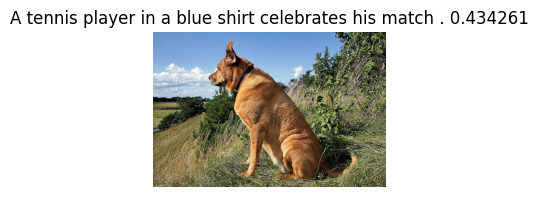

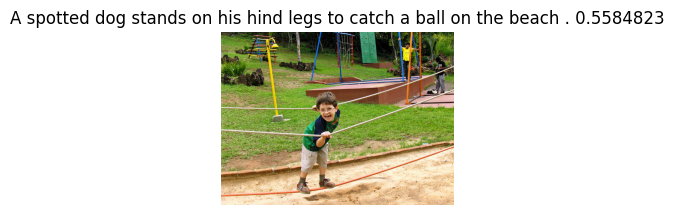

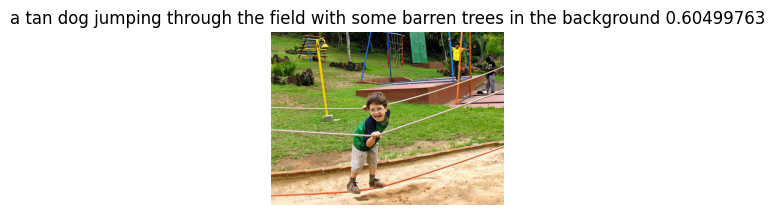

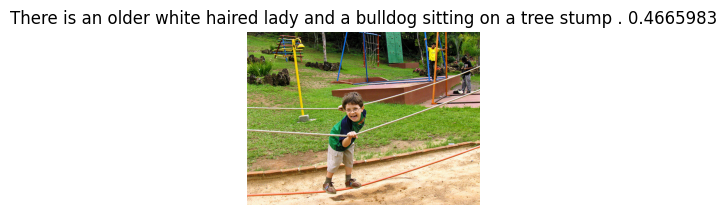

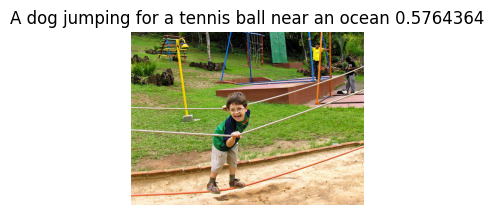

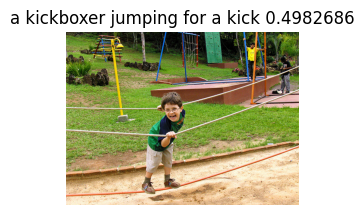

In [78]:
#random.seed(42)

texts = []
for i in range(0,10):
    texts.append(df_test.iloc[rd.randint(0, 499)]['query_text'])
for item in texts:
    get_image_from_text(item)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

Да, ты прав, к сожалению работают они не очень. Причин несколько
    
 - вектора полученные с помощью tf-idf более низкого качества, как правило лучший резульат получается при использовании эмбеддингов, полученных с помощью BERT
 - нужно поработать с моделью нейронной сети (или попробовать бустинги)   
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert (лучший результат дает модель  `all-MiniLM-L6-v2`)
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
или, как я писал тебе выше, TF-IDF + бустинги    
    
</div>

Модель правильно отрабатывает запрещенный контент.
Для текстовых запросов модель выдает изображения. Визуальный анализ результатов показал, что модель объективно выдает слабые результаты на тестовых данных при достаточно высокой предсказанной оценке экспертов.

предположительно для получения лучших результатов необходим более обширный датасет без явного дисбаланса классов.

In [79]:
#!pip install sentence_transformers

In [80]:
#from sentence_transformers import SentenceTransformer

# Load CLIP model
#model = SentenceTransformer("clip-ViT-B-32")



In [81]:
# Encode an image:
#img_emb = model.encode(Image.open("two_dogs_in_snow.jpg"))

# Encode text descriptions
#text_emb = model.encode(
#    ["Two dogs in the snow", "A cat on a table", "A picture of London at night"]
#)

# Compute similarities
#similarity_scores = model.similarity(img_emb, text_emb)
#print(similarity_scores)

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b> комментарий студента</b></font>
   
хотел попробовать реализовать CLIP, но не получается загрузить модель.
!pip install sentence_transformers не работает, выводит ошибку: (WARNING: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x788230c62490>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /simple/sentence-transformers/)

пробовал и на домашнем и на рабочем компах.

Может знаете как это поправить?

</div>

## Выводы

**по итогам первичного анализа датасетов обнаружено**:
1. в данных отсутствуют пропуски.
2. для тренировки модели предоставлено 1000 изображений
3. для тестирования модели предоставлено 100 изображений
4. краудсорсинговая оценка - средняя доля подтвердивших соответствие изображения текстовому описанию составляет всего 7%. среднее количество участников краудсорсинговой оценки - 3 человека
5. экспертная оценка - средняя экспертная оценка не превышает 2

судя по всему мы имеем большой перекос в сторону несоответствия текстов изображениям


**итоги анализа изображений**:
- в датасете представлены изображения разного качества, наклона, пола, типа (фас, профиль и т.д.), тематики
- все изображения цветные
- изображения имеют разные размеры (потребуется приведение к единому формату)

**получение агрегированной оценки**:
для получения агрегированной оценки выбраны оценки экспертов.
среди оценок экспертов выбирается оценка, которую поставило большинство экспертов (т.е. 2 или 3). если все оценки разные, то такие данные удаляются. по итогу обработки оценок и слияния датасета с оценками с тестовым датасетом осталось 5696 записей из 5822)

Визуально подтверждается, что итоговая экспертная оценка вполне отображает соответствие изображения текстовому описанию.

**очистка тренировочного датасета от запрещенного контента**:
по итогам очистки тренировочного датасета от "дестких" описаний осталось 3746 записей.

**векторизация и объединение векторов изображений и текстов**:
для векторизации использовался Tfidf. по итогам векторизации изображений получен вектор размерностью (3746, 1000)

для векторизации изображений применена натренированная модель ResNet18. по итогам векторизации изображений получен вектор размерностью (3746, 512)

по итогам объединения векторов изображений и векторов текстов получен вектор размерностью (3746, 1512)

**выбор метрики качества и обучение модели**:
В рамках этапа обучения рассмотрено 3 модели: Линейная регрессия, Lasso и нейронная сеть.

Лучший результат получен у нейронной сети. Для оценки качества выбрана метрика RMSE. Метрика на валидации - 0,299

**тестирование модели**:
Модель правильно отрабатывает запрещенный контент.
Для текстовых запросов модель выдает изображения. Визуальный анализ результатов показал, что модель объективно выдает слабые результаты на тестовых данных при достаточно высокой предсказанной оценке экспертов.

предположительно для получения лучших результатов необходим более обширный датасет без явного дисбаланса классов.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.
 
    
В процессе ревью я подсветил некоторые критичные моменты (красные комментарии), пожалуйста исправь их.
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.    
Жду твою работу на повторное ревью.
</div>

In [82]:
resnet = models.resnet18(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


URLError: <urlopen error [Errno -3] Temporary failure in name resolution>